# 22 Sept 2015: Numpy, Surface plots, enumerate() and Mandelbrot

## How to use NumPy to produce a 3d surface plot and a contour plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# comment out this next line if you do not want plots to appear in the notebook
%matplotlib inline 

A useful function in numpy is the meshgrid() command; it's used to create a two-dimensional array of indexed points:

In [4]:
xSmall = np.linspace(0,1,6)
ySmall = np.linspace(0,1,6)
xSmall,ySmall = np.meshgrid(xSmall, ySmall)
print(xSmall)
print(ySmall)

[[ 0.   0.2  0.4  0.6  0.8  1. ]
 [ 0.   0.2  0.4  0.6  0.8  1. ]
 [ 0.   0.2  0.4  0.6  0.8  1. ]
 [ 0.   0.2  0.4  0.6  0.8  1. ]
 [ 0.   0.2  0.4  0.6  0.8  1. ]
 [ 0.   0.2  0.4  0.6  0.8  1. ]]
[[ 0.   0.   0.   0.   0.   0. ]
 [ 0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.4  0.4  0.4  0.4  0.4  0.4]
 [ 0.6  0.6  0.6  0.6  0.6  0.6]
 [ 0.8  0.8  0.8  0.8  0.8  0.8]
 [ 1.   1.   1.   1.   1.   1. ]]


In [5]:
print(xSmall[0,0],ySmall[0,0])
print(xSmall[0,3],ySmall[0,3])

0.0 0.0
0.6 0.0


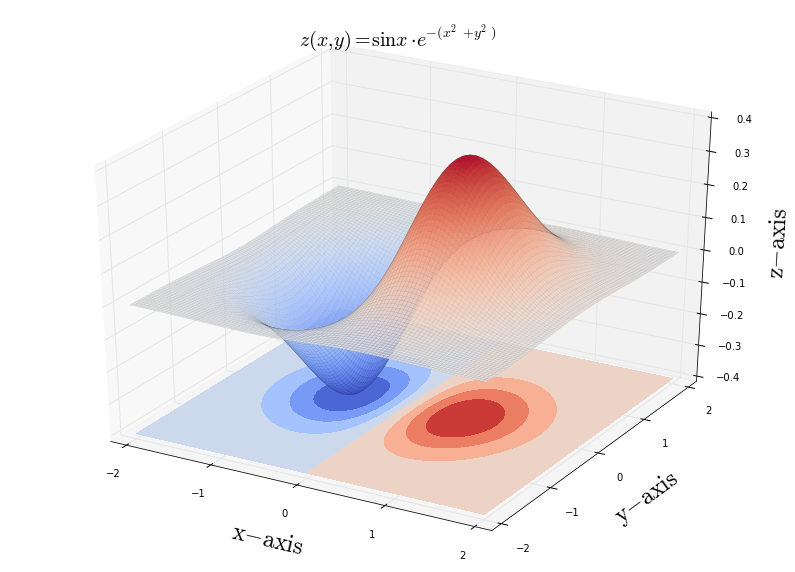

In [6]:
## 3D surface Plot and Contour Plot:
##
###### create two 1d arrays that span the x, y limits for plotting. ##
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
###
###### meshgrid does its magic, turns x and y into 2d arrays.
x,y = np.meshgrid(x, y)
z = np.sin(x)*np.exp(-x**2 -y**2)
###

### Plot the Surface and a Contour Plot: ###
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')
 #
cset = ax.contourf(x, y, z, zdir='z', offset=-0.4, cmap=cm.coolwarm)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
       linewidth=0.03, antialiased=True, alpha = .85)
 #
ax.set_xlabel(r'$\mathrm{x-axis}$', fontsize=24)
ax.set_xlim(-2.1,2.1)
ax.set_ylabel(r'$\mathrm{y-axis}$', fontsize=24)
ax.set_ylim(-2.1, 2.1)
ax.set_zlabel(r'$\mathrm{z-axis}$', fontsize=24)
ax.set_zlim(-0.4, 0.4)
ax.set_title(r'$z(x,y) = \sin x \cdot e^{-(x^2 + y^2)}$', fontsize=20)
plt.savefig('3dSurface.pdf')
plt.show()

## XKCD plots in matplotlib

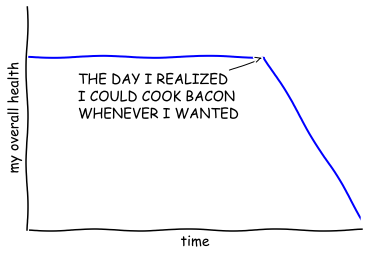

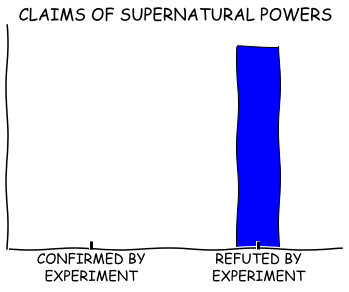

In [7]:
from matplotlib import pyplot as plt
import numpy as np
#import matplotlib
#matplotlib.use("TkAgg")

plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1])
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 110])
ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.yticks([])

plt.title("CLAIMS OF SUPERNATURAL POWERS")

plt.show()

#### New function corner! 

The enumerate() function is a python function that returns an enumerate object---this is a list of tuples containing a pair (index, value) where *index* is an integer and *value* is the, well, *value* of the list at the given index position. It's easier to see than explain: 

In [8]:
choices = ['sugar', 'pasta', 'salad', 'soda', 'one of these "foods" is better than the others']
for index, item in enumerate(choices):
    print(index, item)
#for index, item in enumerate(choices, start = 1):
#    print(index, item)

0 sugar
1 pasta
2 salad
3 soda
4 one of these "foods" is better than the others


In [9]:
print(type(enumerate(choices)))
list(enumerate(choices))

<class 'enumerate'>


[(0, 'sugar'),
 (1, 'pasta'),
 (2, 'salad'),
 (3, 'soda'),
 (4, 'one of these "foods" is better than the others')]

You can use the enumerate object on a numpy array! This can be super handy as we'll see...

In [10]:
import numpy as np

t = np.linspace(0,10,11)
for index, item in enumerate(t):
    print(index, item)

0 0.0
1 1.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 10.0


In [11]:
#from numpy import NaN
 
def mandel(a):
    z = 0
    for n in range(1, 100):
        z = z**2 + a
        if abs(z) > 2:
            return n
    return 0
 

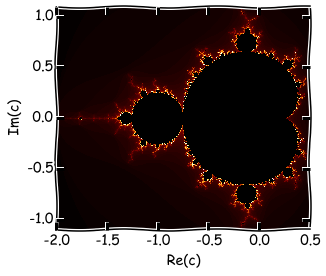

In [13]:
X = np.arange(-2, .5, .002)  # real axis limits
Y = np.arange(-1.1, +1.1, .002) # imaginary axis limits
Z = np.zeros((len(Y), len(X)))   # creates a 2d array filled with zeros
 
for iy, y in enumerate(Y):
    #print (iy, "of", len(Y))
    for ix, x in enumerate(X):
        Z[iy,ix] = mandel(x + 1j * y)
 
plt.imshow(Z, cmap = plt.cm.afmhot, interpolation = 'none', extent = (X.min(), X.max(), Y.min(), Y.max()))
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.savefig("mandelbrot_python.svg")
plt.show()